Nama : Desintya Frasiska Putri<br>
NIM : 211351043<br>
Kelas : Malam B

#IMPORT DATASET

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"desing","key":"5a5a14cd1d8505bff5ccc52f138f4146"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 52.3MB/s]


In [4]:
!mkdir customer-personality-analysis
!unzip customer-personality-analysis.zip -d customer-personality-analysis
!ls customer-personality-analysis

Archive:  customer-personality-analysis.zip
  inflating: customer-personality-analysis/marketing_campaign.csv  
marketing_campaign.csv


# IMPORT LIBRARY YANG DIPAKAI

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/customer-personality-analysis/marketing_campaign.csv',sep="\t")

# DATA DISCOVERY

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df.shape

(2240, 29)

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
df.duplicated().sum()

0

# EDA

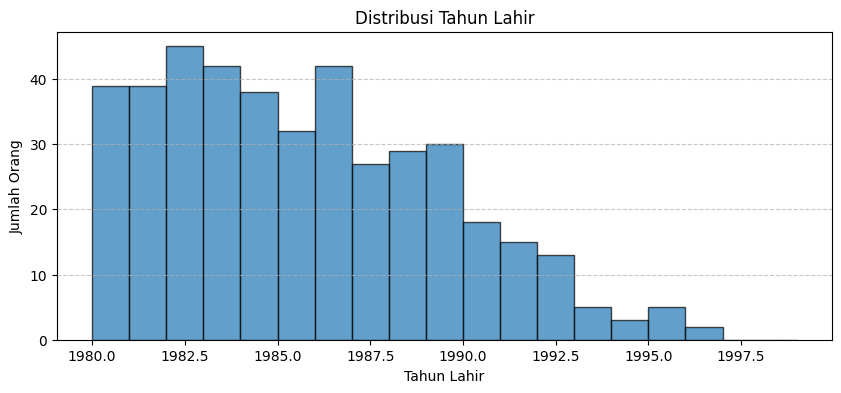

In [13]:
# Membuat histogram untuk menampilkan distribusi tahun lahir
plt.figure(figsize=(10, 4))
plt.hist(df['Year_Birth'], bins=range(1980, 2000, 1), edgecolor='black', alpha=0.7)
plt.xlabel('Tahun Lahir')
plt.ylabel('Jumlah Orang')
plt.title('Distribusi Tahun Lahir')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

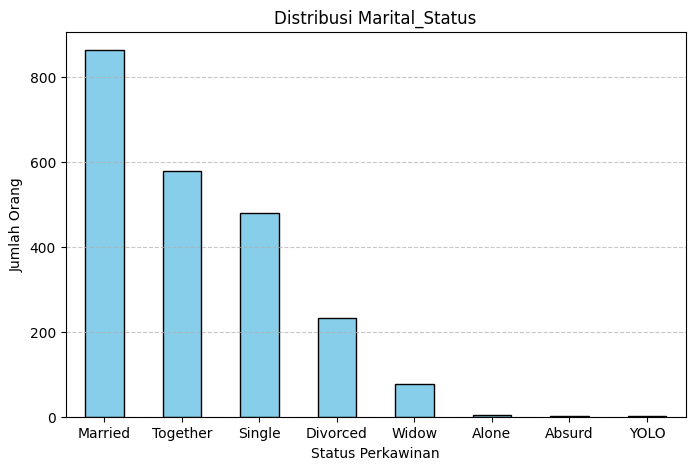

In [14]:
# Menghitung jumlah setiap kategori Marital_Status
marital_status_counts = df['Marital_Status'].value_counts()

# Membuat bar plot
plt.figure(figsize=(8, 5))
marital_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah Orang')
plt.title('Distribusi Marital_Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

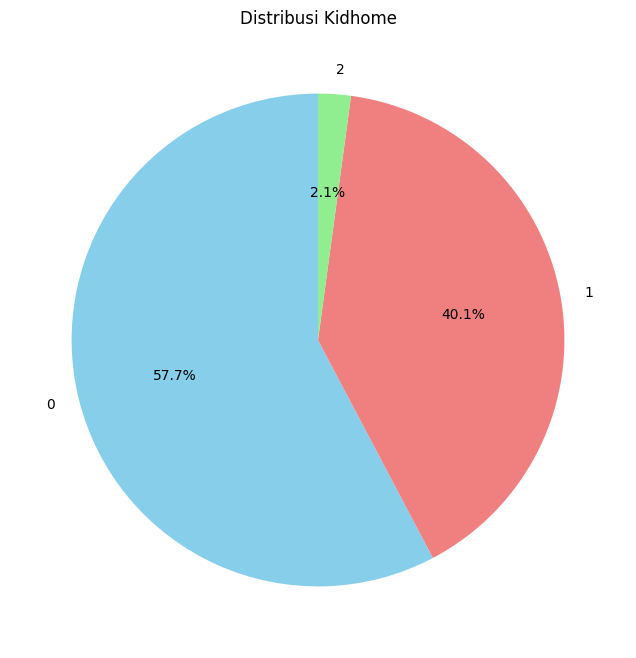

In [15]:
# Menghitung jumlah setiap kategori Kidhome
kidhome_counts = df['Kidhome'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(kidhome_counts, labels=kidhome_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi Kidhome')

# Menampilkan plot
plt.show()

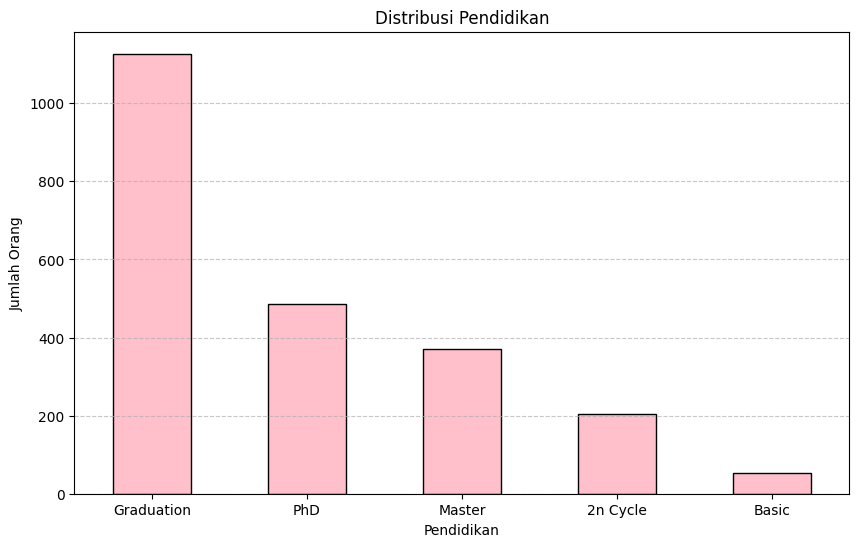

In [16]:
# Menghitung jumlah setiap kategori Education
education_counts = df['Education'].value_counts()

# Membuat bar plot
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Orang')
plt.title('Distribusi Pendidikan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

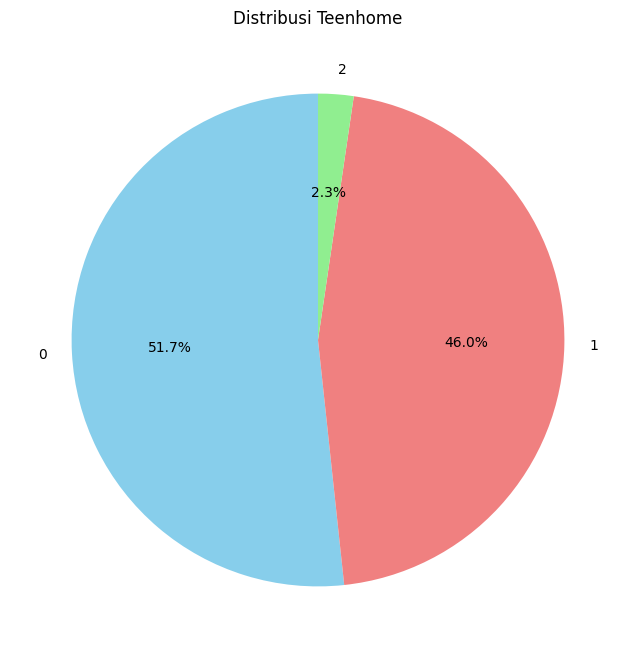

In [17]:
# Menghitung jumlah setiap kategori Teenhome
Teenhome_counts = df['Teenhome'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(Teenhome_counts, labels=Teenhome_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi Teenhome')

# Menampilkan plot
plt.show()

# DATA PREPROCESSING

In [18]:
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [19]:
# merubah tipe data Dt_Customer menjadi tipe data datetime
# cek minimal dan maksimal Dt_Customer
df["Dt_Customer"] = df["Dt_Customer"].apply(pd.to_datetime, dayfirst=True, errors="coerce")
df["Dt_Customer"].agg(["min", "max"])

min   2012-07-30
max   2014-06-29
Name: Dt_Customer, dtype: datetime64[ns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [21]:
# merubah isi data pada kolom marital status semula amone absurd dan yolo menjadi single
# merubah isi data pada kolom matital status semula together dan married menjadi couple
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Married'], 'Couple')
df['Marital_Status'].unique()

array(['Single', 'Couple', 'Divorced', 'Widow'], dtype=object)

In [22]:
# membuat kolom baru yaitu age dengan mengurangi tahun sekarang dengna tahun lahir customer
df['Age'] = 2023 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42


In [23]:
# pengecekan minimal dan maksimal umur pelanggan
df["Age"].agg(["min", "max"])

min     27
max    130
Name: Age, dtype: int64

In [24]:
# dikarenakan terdapat pelanggan dengan umur lebih dari 80 maka data tersebut akan di hitung
counter = df[df["Age"] > 80].count()["ID"]
print(counter)

5


In [25]:
# menghapus data pelanggan dengan umur lebih dari 80
df = df.drop(df[df["Age"] > 80].index)
df.reset_index(drop=True, inplace=True)
df["Age"].agg(["min", "max"])

min    27
max    80
Name: Age, dtype: int64

# analisis pelanggan

In [26]:
# membuat kolom spending untuk mengetahui belanjaan pelanggan
df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,69,27
2,4141,1965,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,58,776
3,6182,1984,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,39,53
4,5324,1981,PhD,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,42,422


In [27]:
# pengecekan apakah ada pelanggan yang tidak pernah belanja sama sekali
i = 0
if df['Spending'][i] == 0:
    print('Terdapat'+ i +'pelanggan yang tidak pernah belanja apapun')
    i = i + 1
else:
    print('Semua pelanggan pernah belanja')

Semua pelanggan pernah belanja


In [28]:
# membuat kolom baru yaitu seniority untuk memberikan informasi berapa bulan sejak pelangan berbelanja
last_date = date(2023,12,23)
df['Seniority'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
df['Seniority'] = pd.to_numeric(df['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
df['Seniority'] = df['Seniority'].round(0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,66,1617,138.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,69,27,119.0
2,4141,1965,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,58,776,126.0
3,6182,1984,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,39,53,120.0
4,5324,1981,PhD,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,42,422,121.0


In [29]:
# menggabungkan jumlah anak dalam satu kolom
df['Children'] =df['Kidhome'] + df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,66,1617,138.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,69,27,119.0,2
2,4141,1965,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,58,776,126.0,0
3,6182,1984,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,39,53,120.0,1
4,5324,1981,PhD,Couple,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,42,422,121.0,1


In [30]:
#mengganti nama kolom
df = df.rename(columns={'MntWines' : "Wines", 'MntFruits' : 'Fruits', 'MntMeatProducts' : 'Meat', 'MntFishProducts' : 'Fish','MntSweetProducts' : 'Sweets', 'MntGoldProds' : 'Gold'})
df = df[['Age', 'Education', 'Marital_Status','Income','Spending','Seniority','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
df.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,66,Graduation,Single,58138.0,1617,138.0,0,635,88,546,172,88,88
1,69,Graduation,Single,46344.0,27,119.0,2,11,1,6,2,1,6
2,58,Graduation,Couple,71613.0,776,126.0,0,426,49,127,111,21,42
3,39,Graduation,Couple,26646.0,53,120.0,1,11,4,20,10,3,5
4,42,PhD,Couple,58293.0,422,121.0,1,173,43,118,46,27,15


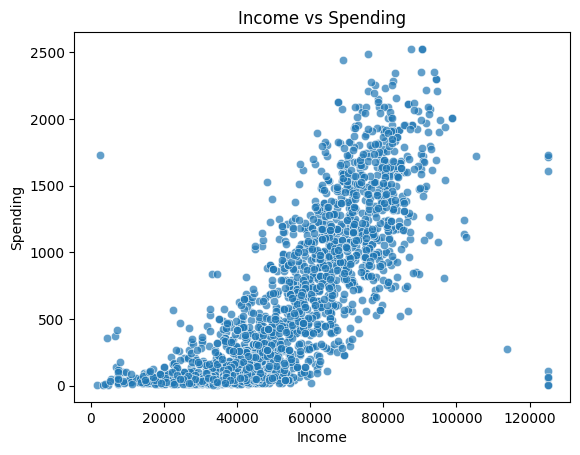

In [31]:
df["Income"] = df["Income"].clip(0, 125000)
sns.scatterplot(data=df, x="Income", y="Spending", palette="viridis", alpha=0.7)
plt.title("Income vs Spending")
plt.show()

In [32]:
# drop two columns
df = df.drop(['Education', 'Marital_Status'], axis=1)
df.head()

,Age,Income,Spending,Seniority,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,66,58138.0,1617,138.0,0,635,88,546,172,88,88
1,69,46344.0,27,119.0,2,11,1,6,2,1,6
2,58,71613.0,776,126.0,0,426,49,127,111,21,42
3,39,26646.0,53,120.0,1,11,4,20,10,3,5
4,42,58293.0,422,121.0,1,173,43,118,46,27,15


In [33]:
df=df.dropna(subset=['Income'])
df=df[df['Income']<600000]

In [34]:
scaler=StandardScaler()

X_std=scaler.fit_transform(df[['Income','Seniority','Spending']])
X = normalize(X_std,norm='l2')

# MODELING

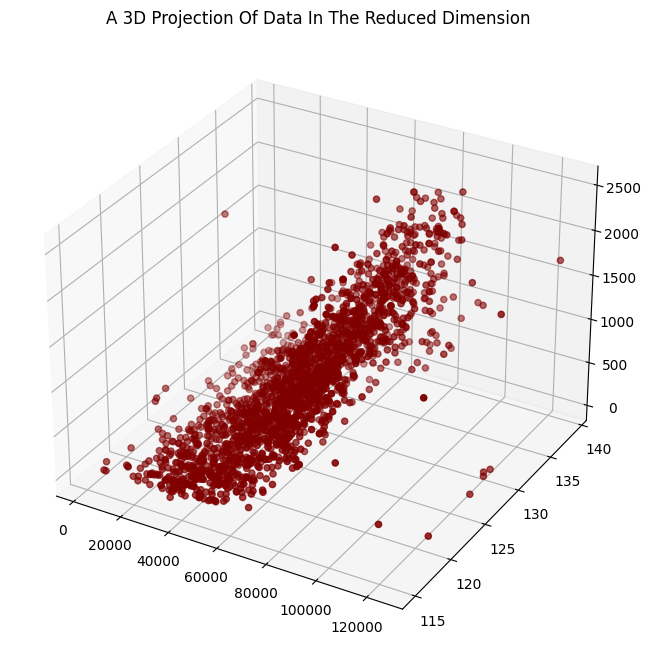

In [35]:
#A 3D Projection Of Data In The Reduced Dimension
x =df["Income"]
y =df["Seniority"]
z =df["Spending"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

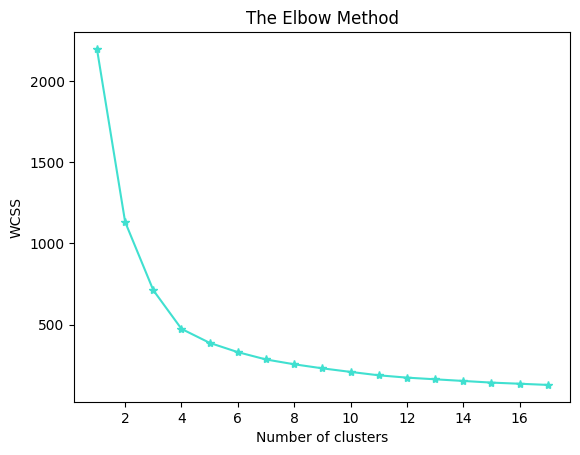

In [36]:
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

In [38]:
y_kmeans

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

#VISUALISASI HASIL ALGORITMA

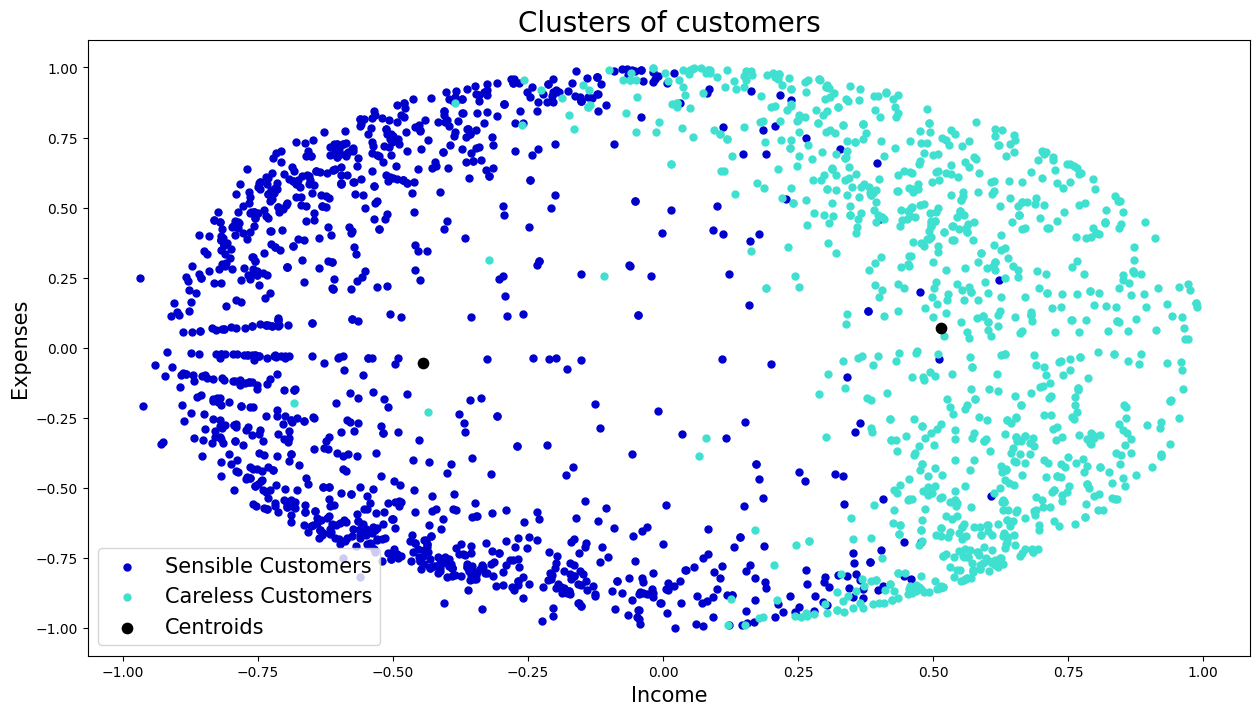

In [39]:
# Visualising the clusters
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

*Customer who has Low income and Low Expenses are Sensible customers.

*Customer who has Low income and High Expenses are Careless customers.

In [40]:
df['Clusters'] = y_kmeans
df.head()

,Age,Income,Spending,Seniority,Children,Wines,Fruits,Meat,Fish,Sweets,Gold,Clusters
0,66,58138.0,1617,138.0,0,635,88,546,172,88,88,1
1,69,46344.0,27,119.0,2,11,1,6,2,1,6,0
2,58,71613.0,776,126.0,0,426,49,127,111,21,42,1
3,39,26646.0,53,120.0,1,11,4,20,10,3,5,0
4,42,58293.0,422,121.0,1,173,43,118,46,27,15,0


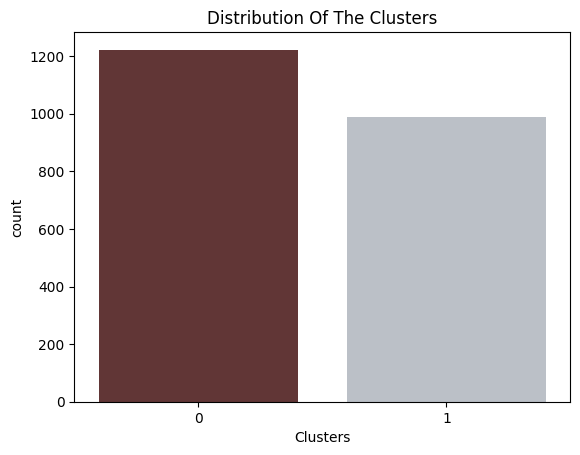

In [41]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# SAVE HASIL MODEL

In [42]:
df.to_excel('output_cluster.xlsx')